In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
def asympRead(particle, cutoff, cfgname, prefix): 
    return pd.concat([pd.read_csv("output/{}.{}/{}/asymp-{:g}.dat".format(prefix, cfgname, particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}.{}/{}/minE.dat".format(prefix, cfgname, particle), header=None, names=["cutscale", "E"], index_col=0)

In [4]:
def plotParticle(ax, pname, cfgname, prefix, window=[-np.inf, np.inf]):
    config = json.load(open(cfgname+".cfg"))
    data, peaks = asympRead(pname, config[pname]["cutscales"], cfgname, prefix)
    plotData = data.loc[(data.index > window[0]) & (data.index < window[1])].plot(marker="o", ls="", logy=True, ax=ax, title=pname+"("+"{:.5f}".format(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])+")")
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[float(pos)][0], ls="--", color=color)

In [5]:
def doPlots(cfgname, prefix, window=None):
    config = json.load(open(cfgname+".cfg"))
    fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
    for i,pname in enumerate(config.keys()):
        plotParticle(axes[i], pname, cfgname, prefix, [-np.inf, np.inf] if window is None else config[pname]["eq"]["E"] + np.array([-window, window]))


In [6]:
def printCheck(cfgname, prefix):
    config = json.load(open(cfgname+".cfg"))
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        print("{}({})".format(pname,peaks.iloc[-1][0]))
        print("peaks - peaks[-1]")
        print(peaks - peaks.iloc[-1])
        print("\n")
        print("peaks[i]-peaks[i-1]")
        print(peaks.diff())
        print("\n---\n")

In [7]:
def readMine(cfgname, prefix):
    config = json.load(open(cfgname+".cfg"))
    my = dict()
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
    my = pd.DataFrame.from_dict(my, orient="index")
    my.columns = ["my("+prefix+")"]
    return my

# Charmonium

## Linear

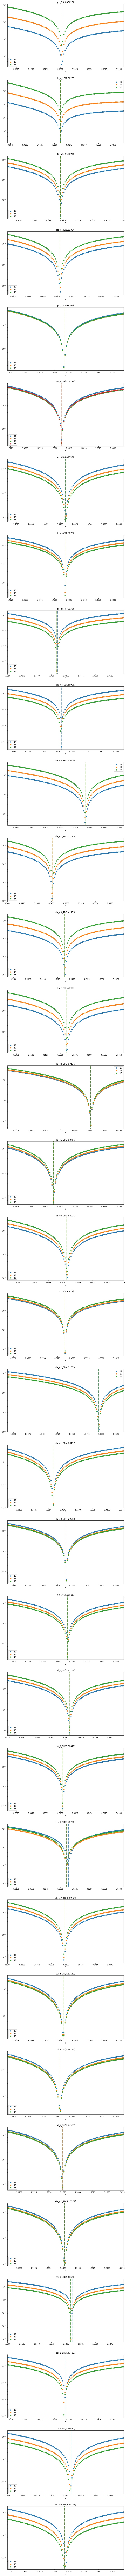

In [8]:
doPlots("c-lin", "lin")

In [9]:
printCheck("c-lin", "lin")

psi_1S(0.13027868649363)
peaks - peaks[-1]
                     E
cutscale              
15       -4.470300e-10
16       -4.470300e-10
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16        0.000000e+00
17        4.470300e-10

---

eta_c_1S(0.016033229171764002)
peaks - peaks[-1]
                     E
cutscale              
15       -6.985003e-12
16        2.327999e-12
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16        9.313002e-12
17       -2.327999e-12

---

psi_2S(0.7120364742279001)
peaks - peaks[-1]
                     E
cutscale              
15        9.536750e-09
16       -9.536740e-09
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16       -1.907349e-08
17        9.536740e-09

---

eta_c_2S(0.6679404296875)
peaks - peaks[-1]
                 E
cutscale          
15     

In [10]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-lin", "lin"))

In [11]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
)\
.round({"dev(lin)": 3, "alldev(lin)": 3})\
.reindex_axis(["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)"], axis=1)

In [12]:
compiled.sort_values("alldev(lin)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin)
name,,,,,,,
chi_c0_3P,NaN,4202.0,4131,4230,4229.975586,0.024,0.024
eta_c_1S,2984.0,2982.0,2979,2983,2982.033229,0.967,0.033
psi_1_1D,3778.0,3785.0,3787,3787,3787.058594,0.059,0.059
h_c_1P,3525.0,3516.0,3519,3522,3522.095215,0.095,0.095
psi_4S,4415.0,4406.0,4273,4412,4411.897461,0.103,0.103
chi_c0_2P,3918.0,3852.0,3842,3869,3869.114746,0.115,0.115
eta_c_4S,NaN,4384.0,4250,4388,4387.824219,0.176,0.176
h_c_3P,NaN,4279.0,4184,4285,4285.234375,0.234,0.234
h_c_2P,NaN,3934.0,3908,3940,3939.765625,0.234,0.234


## Screening

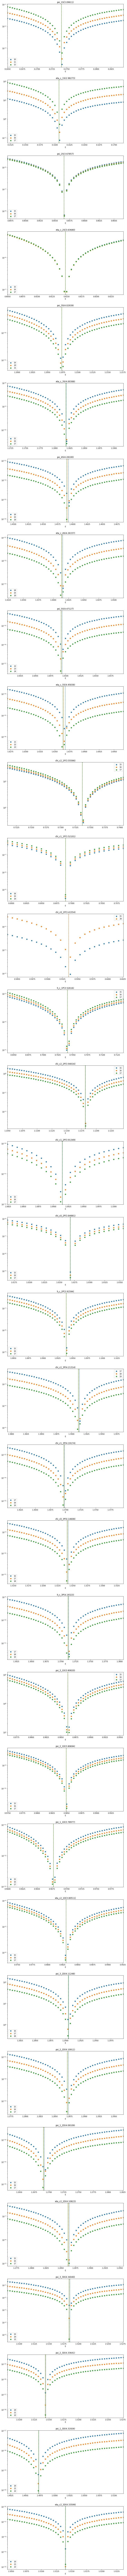

In [13]:
doPlots("c-scr", "scr", window=1E-2)

In [14]:
printCheck("c-scr", "scr")

psi_1S(0.27411268234253)
peaks - peaks[-1]
                     E
cutscale              
10        4.768372e-07
11        1.907349e-08
12        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
10                 NaN
11       -4.577637e-07
12       -1.907349e-08

---

eta_c_1S(0.16072542500496)
peaks - peaks[-1]
                     E
cutscale              
15       -1.192090e-09
16        1.192090e-09
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16        2.384180e-09
17       -1.192090e-09

---

psi_2S(0.8565690917968699)
peaks - peaks[-1]
                     E
cutscale              
15        6.103516e-07
16        0.000000e+00
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16       -6.103516e-07
17        0.000000e+00

---

eta_c_2S(0.8148003792762799)
peaks - peaks[-1]
                     E
cutscale              


In [15]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-scr", "scr"))

In [16]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})\
.reindex_axis(["exp", "8", "11", "SP", "my(scr)", "dev(scr)", "alldev(scr)"], axis=1)\

In [17]:
compiled.sort_values("dev(scr)")

,exp,8,11,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,
psi_4S,4415.0,4406.0,4273,4281,4281.000000,0.000,0.000
chi_c1_1P,3511.0,3505.0,3510,3521,3521.010338,0.010,0.010
eta_c2_3D,NaN,NaN,4326,4336,4335.987566,0.012,0.012
psi_2_1D,3823.0,3800.0,3798,3807,3806.941406,0.059,0.059
h_c_2P,NaN,3934.0,3908,3916,3915.940033,0.060,0.060
chi_c0_3P,NaN,4202.0,4131,4146,4146.078125,0.078,0.078
eta_c2_1D,NaN,3799.0,3796,3805,3805.107422,0.107,0.107
psi_2_2D,NaN,4158.0,4100,4109,4109.112915,0.113,0.113
eta_c_3S,NaN,4043.0,3991,4004,4003.882813,0.117,0.117


# Compiled charmonia

In [18]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-lin", "lin")).join(readMine("c-scr", "scr"))

In [19]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
).join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3, "alldev(lin)": 3, "dev(lin)": 3})

compiled = compiled.join(\
    compiled["dev(lin)"].add(compiled["dev(scr)"]).rename("dev(tot)")\
)\
.join(\
    compiled["alldev(lin)"].add(compiled["alldev(scr)"]).rename("alldev(tot)")\
)\
.reindex_axis(["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)", "SP", "my(scr)", "dev(scr)", "alldev(scr)", "dev(tot)", "alldev(tot)"], axis=1)\

## description of columns
* my(lin), my(scr) - my results for linear and screened potential
* dev(lin), dev(scr) - deviation of my results from those represented in paper
* alldev(lin), alldev(scr) - minimum among deviations from: exp, 8, 11, LP(SP). columns shown in the article
* dev(tot) = dev(lin) + dev(scr)
* alldev(tot) = alldev(lin) + alldev(scr)

In [20]:
compiled.sort_values("alldev(tot)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
chi_c0_3P,NaN,4202.0,4131,4230,4229.975586,0.024,0.024,4146,4146.078125,0.078,0.078,0.102,0.102
psi_4S,4415.0,4406.0,4273,4412,4411.897461,0.103,0.103,4281,4281.000000,0.000,0.000,0.103,0.103
h_c_1P,3525.0,3516.0,3519,3522,3522.095215,0.095,0.095,3526,3526.158234,0.158,0.158,0.253,0.253
eta_c2_3D,NaN,NaN,4326,4478,4477.726562,0.273,0.273,4336,4335.987566,0.012,0.012,0.285,0.285
h_c_2P,NaN,3934.0,3908,3940,3939.765625,0.234,0.234,3916,3915.940033,0.060,0.060,0.294,0.294
eta_c_1S,2984.0,2982.0,2979,2983,2982.033229,0.967,0.033,2984,2982.725425,1.275,0.275,2.242,0.308
psi_1S,3097.0,3090.0,3097,3097,3096.278686,0.721,0.166,3097,3096.112682,0.887,0.166,1.608,0.332
eta_c2_1D,NaN,3799.0,3796,3806,3805.663086,0.337,0.337,3805,3805.107422,0.107,0.107,0.444,0.444
h_c_3P,NaN,4279.0,4184,4285,4285.234375,0.234,0.234,4193,4193.234375,0.234,0.234,0.468,0.468


In [21]:
compiled.sort_values("dev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
psi_4S,4415.0,4406.0,4273,4412,4411.897461,0.103,0.103,4281,4281.000000,0.000,0.000,0.103,0.103
chi_c1_1P,3511.0,3505.0,3510,3516,3513.626953,2.373,2.373,3521,3521.010338,0.010,0.010,2.383,2.383
eta_c2_3D,NaN,NaN,4326,4478,4477.726562,0.273,0.273,4336,4335.987566,0.012,0.012,0.285,0.285
psi_2_1D,3823.0,3800.0,3798,3807,3806.414062,0.586,0.527,3807,3806.941406,0.059,0.059,0.645,0.586
h_c_2P,NaN,3934.0,3908,3940,3939.765625,0.234,0.234,3916,3915.940033,0.060,0.060,0.294,0.294
chi_c0_3P,NaN,4202.0,4131,4230,4229.975586,0.024,0.024,4146,4146.078125,0.078,0.078,0.102,0.102
eta_c2_1D,NaN,3799.0,3796,3806,3805.663086,0.337,0.337,3805,3805.107422,0.107,0.107,0.444,0.444
psi_2_2D,NaN,4158.0,4100,4165,4163.913574,1.086,1.086,4109,4109.112915,0.113,0.113,1.199,1.199
eta_c_3S,NaN,4043.0,3991,4048,4047.257812,0.742,0.742,4004,4003.882813,0.117,0.117,0.859,0.859


In [22]:
compiled.sort_values("alldev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
psi_4S,4415.0,4406.0,4273,4412,4411.897461,0.103,0.103,4281,4281.000000,0.000,0.000,0.103,0.103
chi_c1_1P,3511.0,3505.0,3510,3516,3513.626953,2.373,2.373,3521,3521.010338,0.010,0.010,2.383,2.383
eta_c2_3D,NaN,NaN,4326,4478,4477.726562,0.273,0.273,4336,4335.987566,0.012,0.012,0.285,0.285
psi_2_1D,3823.0,3800.0,3798,3807,3806.414062,0.586,0.527,3807,3806.941406,0.059,0.059,0.645,0.586
h_c_2P,NaN,3934.0,3908,3940,3939.765625,0.234,0.234,3916,3915.940033,0.060,0.060,0.294,0.294
chi_c0_3P,NaN,4202.0,4131,4230,4229.975586,0.024,0.024,4146,4146.078125,0.078,0.078,0.102,0.102
eta_c2_1D,NaN,3799.0,3796,3806,3805.663086,0.337,0.337,3805,3805.107422,0.107,0.107,0.444,0.444
psi_2_2D,NaN,4158.0,4100,4165,4163.913574,1.086,1.086,4109,4109.112915,0.113,0.113,1.199,1.199
eta_c_3S,NaN,4043.0,3991,4048,4047.257812,0.742,0.742,4004,4003.882813,0.117,0.117,0.859,0.859


# Bottomonium

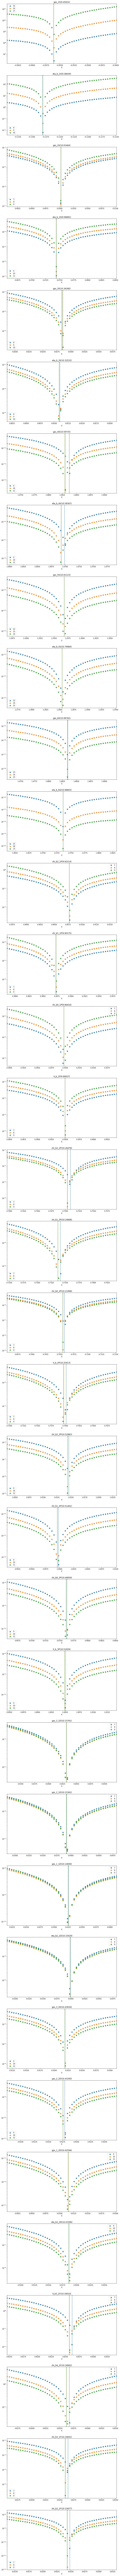

In [23]:
doPlots("b-scr", "scr")

In [24]:
printCheck("b-scr", "scr")

yps_1S(-0.056078734645247)
peaks - peaks[-1]
                     E
cutscale              
15        8.195640e-10
16       -7.450600e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16       -8.940700e-10
17        7.450600e-11

---

eta_b_1S(-0.12801404418945)
peaks - peaks[-1]
                     E
cutscale              
8        -1.678467e-06
9         1.525879e-07
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9         1.831055e-06
10       -1.525879e-07

---

yps_2S(0.500238671875)
peaks - peaks[-1]
                 E
cutscale          
7         0.000010
8        -0.000029
9         0.000000


peaks[i]-peaks[i-1]
                 E
cutscale          
7              NaN
8        -0.000039
9         0.000029

---

eta_b_2S(0.47440859375)
peaks - peaks[-1]
                 E
cutscale          
9         0.000010
10        0.000005
11        0.0000

In [25]:
article = pd.read_csv("../data/bottomonia.csv", index_col=0)
res = article.join(readMine("b-scr", "scr"))

In [26]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})\
.reindex_axis(["PDG", "SNR", "GI", "NR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"], axis=1)\

## description of columns
* my(scr) - my results for screened potential
* dev(scr) - deviation of my results from those represented in paper
* alldev(scr) - minimum among deviations from: PDG, SNR, GI, NR, SP; columns shown in the article

In [27]:
compiled.sort_values("alldev(scr)")

,PDG,SNR,GI,NR,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,,
yps_2_2D,NaN,10438.0,10449,10418.0,10432,10432.000000,0.000,0.000
chi_b0_2P,10233.0,10226.0,10226,10221.0,10220,10219.982910,0.017,0.017
eta_b_6S,NaN,11011.0,11097,NaN,10988,10988.028687,0.029,0.029
h_b_2P,10260.0,10256.0,10250,10240.0,10254,10254.131226,0.131,0.131
eta_b_5S,NaN,10817.0,10869,NaN,10800,10799.843750,0.156,0.156
chi_b0_1P,9859.0,9865.0,9847,9855.0,9864,9864.164185,0.164,0.164
yps_3S,10355.0,10351.0,10354,10349.0,10343,10342.804688,0.195,0.195
yps_5S,10865.0,10831.0,10878,10818.0,10811,10811.234375,0.234,0.234
h_b_3P,NaN,10529.0,10541,10516.0,10519,10519.292969,0.293,0.293
